<a href="https://colab.research.google.com/github/hawk20434/Software-tools-for-data-collection/blob/main/PW_01_Lygin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа 1. Начало работы с API

**Выполнил: Лыгин М.В**

Вариант - 8. История конкурсов: Анализ динамики проведения конкурсов по большим
данным

# 1.1 Скачивание наборов данных Kaggle

Дополнительная информация по работе с [Kaggle API](https://github.com/Kaggle/kaggle-api)

1. **Создайте ключ `API` в `Kaggle`**.

Моя учетная запись -> Settings-> API -> Создать новые токены API.

На ваш компьютер будет загружен файл `kaggle.json`. Вы можете загрузить на `Google` Диск вручную или использовать для загрузки приведенный ниже скрипт.

Если вы хотите использовать скрипт для загрузки файла `kaggle.json`, используйте следующий фрагмент в ячейке кода:

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mihaillygin","key":"6d7526a6227bab4b05de3942b72b6a95"}'}

Установите `Kaggle API`, используя

In [2]:
!pip install -q kaggle

Переместите файл `kaggle.json` в **~/.kaggle**, где клиент `API` ожидает расположения вашего токена:

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

Предоставьте разрешения на изменение, чтобы избежать предупреждения при запуске инструмента `Kaggle`.

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

Теперь вы можете получить доступ к наборам данных с помощью клиента

In [5]:
!kaggle datasets list

ref                                                              title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                          Student Performance Factors                          94KB  2024-09-02 10:53:57           4104         94  1.0              
haseebindata/student-performance-predictions                     Student Performance Predictions                       9KB  2024-08-17 06:57:57          10895        235  0.9411765        
hanaksoy/customer-purchasing-behaviors                           Customer Purchasing Behaviors                         1KB  2024-09-01 22:18:07           2837         38  1.0              
abdullah0a/retail-sales-data-with-seasonal-trends-and-m

In [6]:
import kaggle
kaggle.api.dataset_list()

[lainguyn123/student-performance-factors,
 haseebindata/student-performance-predictions,
 hanaksoy/customer-purchasing-behaviors,
 abdullah0a/retail-sales-data-with-seasonal-trends-and-marketing,
 marius2303/ad-click-prediction-dataset,
 novandraanugrah/bitcoin-historical-datasets-2018-2024,
 waqi786/climate-change-impact-on-agriculture,
 uom190346a/ai-powered-job-market-insights,
 abdullah0a/human-age-prediction-synthetic-dataset,
 waqi786/most-used-beauty-cosmetics-products-in-the-world,
 thebumpkin/300-world-music-tracks-with-spotify-data,
 muhammadehsan02/olympic-summer-games-paris-2024,
 shashanks1202/retail-transactions-online-sales-dataset,
 willianoliveiragibin/gym-exercises,
 stefanydeoliveira/summer-olympics-medals-1896-2024,
 abdullahashfaqvirk/student-mental-health-survey,
 berkayalan/paris-2024-olympics-medals,
 muhammadehsan02/126-years-of-historical-olympic-dataset,
 umeradnaan/tourism-dataset,
 mouathalmansour/perfumes-price-in-ksa-stores]

In [7]:
# поиск наборов данных на Kaggle о ""ключевое слово"""
datasets = kaggle.api.datasets_list(search="kaggle competitions analysis")
print(datasets)

[{'subtitleNullable': 'Datasets and notebooks of the open Machine Learning course mlcourse.ai', 'creatorNameNullable': 'Yury Kashnitsky', 'creatorUrlNullable': 'kashnitsky', 'totalBytesNullable': 53599525, 'urlNullable': 'https://www.kaggle.com/datasets/kashnitsky/mlcourse', 'licenseNameNullable': 'CC BY-NC-SA 4.0', 'descriptionNullable': None, 'ownerNameNullable': 'Yury Kashnitsky', 'ownerRefNullable': 'kashnitsky', 'titleNullable': 'mlcourse.ai', 'currentVersionNumberNullable': 17, 'usabilityRatingNullable': 0.88235295, 'id': 32132, 'ref': 'kashnitsky/mlcourse', 'subtitle': 'Datasets and notebooks of the open Machine Learning course mlcourse.ai', 'hasSubtitle': True, 'creatorName': 'Yury Kashnitsky', 'hasCreatorName': True, 'creatorUrl': 'kashnitsky', 'hasCreatorUrl': True, 'totalBytes': 53599525, 'hasTotalBytes': True, 'url': 'https://www.kaggle.com/datasets/kashnitsky/mlcourse', 'hasUrl': True, 'lastUpdated': '2018-12-09T16:45:09.507Z', 'downloadCount': 47925, 'isPrivate': False, '

In [8]:
!kaggle datasets list -s "kaggle competitions analysis"

ref                                                           title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
kashnitsky/mlcourse                                           mlcourse.ai                                         51MB  2018-12-09 16:45:09          47925       1680  0.88235295       
willieliao/2017-march-ml-mania-processed-predictions          2017 March ML Mania Processed Predictions           15MB  2017-04-04 03:39:40            267         12  0.8235294        
andradaolteanu/kaggle-analytics-competitions-metadata         Kaggle Analytics Competitions - Metadata           180KB  2022-11-01 15:29:57             84         36  1.0              
harrybassi13/formula-1                                        Formula 1 Dat

# Изучим датасет **🔥Kaggle's All Completed Competition 🏅 Dataset🔥**


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
datasets = kaggle.api.datasets_list(search="🔥Kaggle's All Completed Competition 🏅 Dataset🔥")
df1=pd.DataFrame(datasets)
pd.DataFrame(datasets)

,subtitleNullable,creatorNameNullable,creatorUrlNullable,totalBytesNullable,urlNullable,licenseNameNullable,descriptionNullable,ownerNameNullable,ownerRefNullable,titleNullable,...,topicCount,viewCount,voteCount,currentVersionNumber,hasCurrentVersionNumber,usabilityRating,hasUsabilityRating,tags,files,versions
0,DATASET OF ALL COMPLETED KAGGLE COMPETITION TI...,SOUMENDRA PRASAD MOHANTY,soumendraprasad,361636,https://www.kaggle.com/datasets/soumendraprasa...,CC0: Public Domain,None,SOUMENDRA PRASAD MOHANTY,soumendraprasad,🔥Kaggle's All Completed Competition 🏅 Dataset🔥,...,0,2505,69,2,True,1.0,True,"[{'nameNullable': 'computer science', 'descrip...",[],[]


In [56]:
!kaggle datasets download -d soumendraprasad/kaggles-all-completed-competition-dataset

Dataset URL: https://www.kaggle.com/datasets/soumendraprasad/kaggles-all-completed-competition-dataset
License(s): CC0-1.0
kaggles-all-completed-competition-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [12]:
import zipfile
with zipfile.ZipFile("kaggles-all-completed-competition-dataset.zip","r") as zip_ref:
    zip_ref.extractall()

In [13]:
!ls

'kaggle comp_submission.csv'   kaggles-all-completed-competition-dataset.zip
 kaggle.json		       sample_data


In [57]:
# Загрузим найденный датасет и посомтрим первые строчки
df = pd.read_csv("kaggle comp_submission.csv")
df.head(3)

,comp_name,comp_Reward,comp_link,teams,competitors,Entries,Tag,desc,code_link,start_date,start_month,start_year,final_date,final_month,final_year
0,Tabular Playground Series - Sep 2022,Swag,https://www.kaggle.com/competitions/tabular-pl...,1381,1447,13085,tabular data,The competing Kaggle merchandise stores we saw...,https://www.kaggle.com/code/elem3ntary/tps-sep...,1,Sep,2022,1,Oct,2022
1,AI Village Capture the Flag @ DEFCON,25000,https://www.kaggle.com/competitions/ai-village...,668,668,4235,games,Help Henry Hacker get to Homecoming during DEF...,https://www.kaggle.com/code/tatamikenn/defcon3...,12,Aug,2022,12,Sep,2022
2,Tabular Playground Series - Aug 2022,Swag,https://www.kaggle.com/competitions/tabular-pl...,1888,1972,21790,tabular data,The August 2022 edition of the Tabular Playgro...,https://www.kaggle.com/code/neesham/nlp-for-be...,1,Aug,2022,1,Sep,2022


In [58]:
# Посмотрим последние записи в датасете, в количестве 3 штук
df.tail(3)

,comp_name,comp_Reward,comp_link,teams,competitors,Entries,Tag,desc,code_link,start_date,start_month,start_year,final_date,final_month,final_year
524,World Cup 2010 - Take on the Quants,100,https://www.kaggle.com/competitions/worldcup2010,63,64,63,custom metric,The investment banksThe JP Morgan analysishttp...,https://www.kaggle.com/competitions/worldcup20...,3,Jun,2010,11,Jun,2010
525,Predict HIV Progression,500,https://www.kaggle.com/competitions/hivprogres...,107,116,855,mce,This contest focuses on using the nucleotide s...,https://www.kaggle.com/code/mohammedsakibrahma...,28,Apr,2010,2,Aug,2010
526,Forecast Eurovision Voting,1000,https://www.kaggle.com/competitions/Eurovision...,22,25,22,ae,The Eurovision Song Contest is an annual compe...,https://www.kaggle.com/competitions/Eurovision...,7,Apr,2010,25,May,2010


In [59]:
# Посмотрим общее описание, типы данных количество данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   comp_name    527 non-null    object
 1   comp_Reward  527 non-null    object
 2   comp_link    527 non-null    object
 3   teams        527 non-null    int64 
 4   competitors  527 non-null    int64 
 5   Entries      527 non-null    int64 
 6   Tag          527 non-null    object
 7   desc         527 non-null    object
 8   code_link    527 non-null    object
 9   start_date   527 non-null    int64 
 10  start_month  527 non-null    object
 11  start_year   527 non-null    int64 
 12  final_date   527 non-null    int64 
 13  final_month  527 non-null    object
 14  final_year   527 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 61.9+ KB


In [60]:
# Проверка на пустые значения
df.isnull().any()

,0
comp_name,False
comp_Reward,False
comp_link,False
teams,False
competitors,False
Entries,False
Tag,False
desc,False
code_link,False
start_date,False


In [70]:
df[['Entries']].describe()

,Entries
count,527.000000
mean,14950.631879
std,20808.985813
min,21.000000
25%,1425.000000
50%,6135.000000
75%,19678.500000
max,131888.000000


In [72]:
df['teams'].value_counts()

,count
teams,
2920,4
50,4
2618,4
1089,3
86,3
...,...
2737,1
558,1
1475,1


In [61]:
# Интересно посмотреть, количество реальных соревнований по именам, для этого выведем количество уникальных значений по столбцу
df['comp_name'].nunique()

525

In [62]:
# Столбец таг отвечает за тематику мероприятий, необхоидмо посомтреть какое количество тематик есть
df['Tag'].nunique()

79

In [63]:
df['Tag'].unique()

array(['tabular data', 'games', 'image data', 'classification', 'nlp',
       'business', 'custom metric', 'data analytics', 'sports',
       'environment', 'retail and shopping', 'education',
       'earth and nature', 'movies and tv shows', 'video games',
       'text data', 'health', 'numpy', 'meancolumnwisemae', 'beginner',
       'science and technology', 'automobiles and vehicles',
       'text mining', 'tensorflow', 'physics', 'reinforcement learning',
       'biology', 'internet', 'simulations', 'audio data',
       'computer vision', 'meanfscorebeta', 'tpu', 'time series analysis',
       'artificial intelligence', 'geospatial analysis',
       'binary classification', 'optimization', 'video data',
       'jobs and career', 'map@{k}', 'meanbesterroratk', 'art',
       'earth science', 'multiclassloss', 'auc', 'cancer', 'finance',
       'logloss', 'basketball', 'chemistry', 'rmsle',
       'categorizationaccuracy', 'multiclass classification',
       'clothing and accessories'

In [64]:
# Посмотрим наиболее популярные таги
df['Tag'].value_counts()[:10]

,count
Tag,
tabular data,112
image data,95
custom metric,58
auc,35
rmse,20
internet,18
text data,16
sports,13
rmsle,12


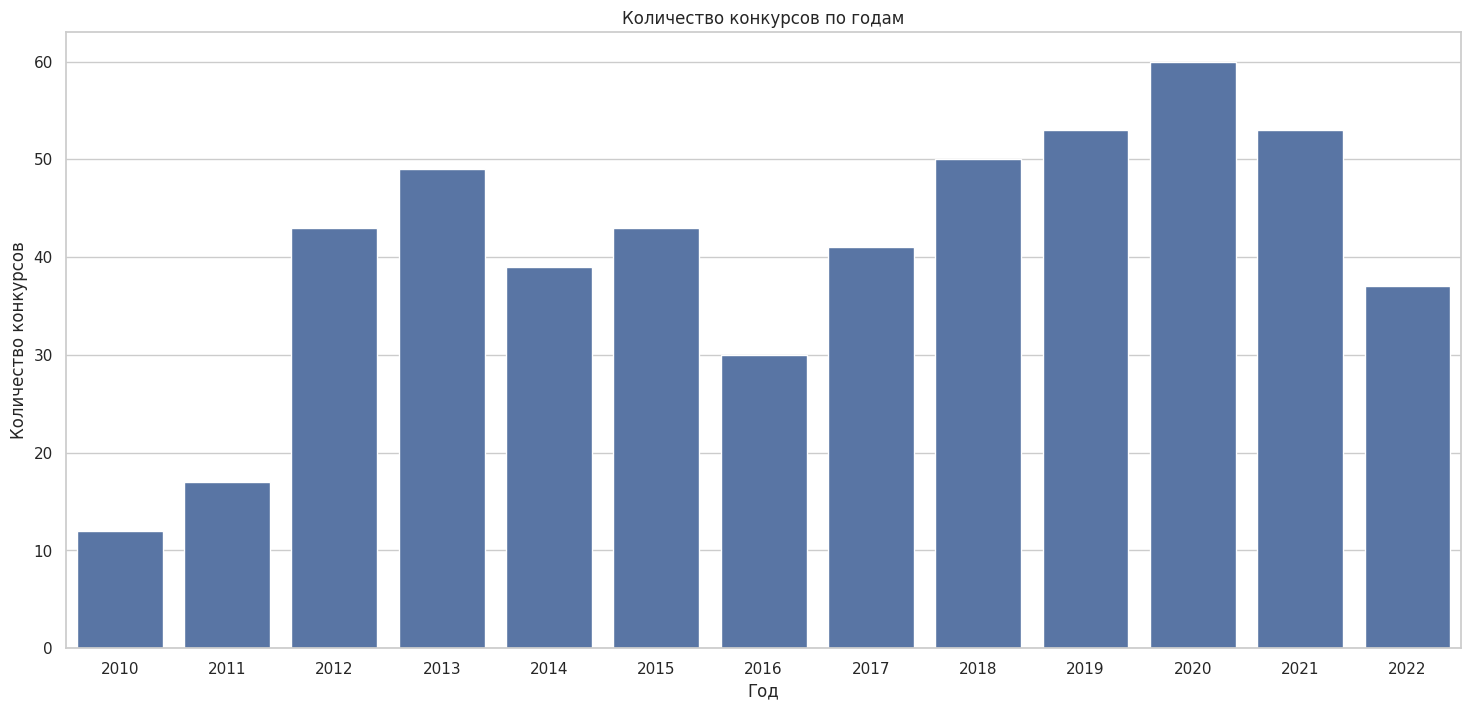

In [65]:
# Анализ конкурсов по годам (start_year) - есть тенденция к увеличнию, но статистика за 2022 веротяно либо неполная или есть факторы влияющие на нее
yearly_counts = df['start_year'].value_counts().sort_index()
plt.figure(figsize=(18, 8))
sns.barplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title('Количество конкурсов по годам')
plt.xlabel('Год')
plt.ylabel('Количество конкурсов')
plt.show()

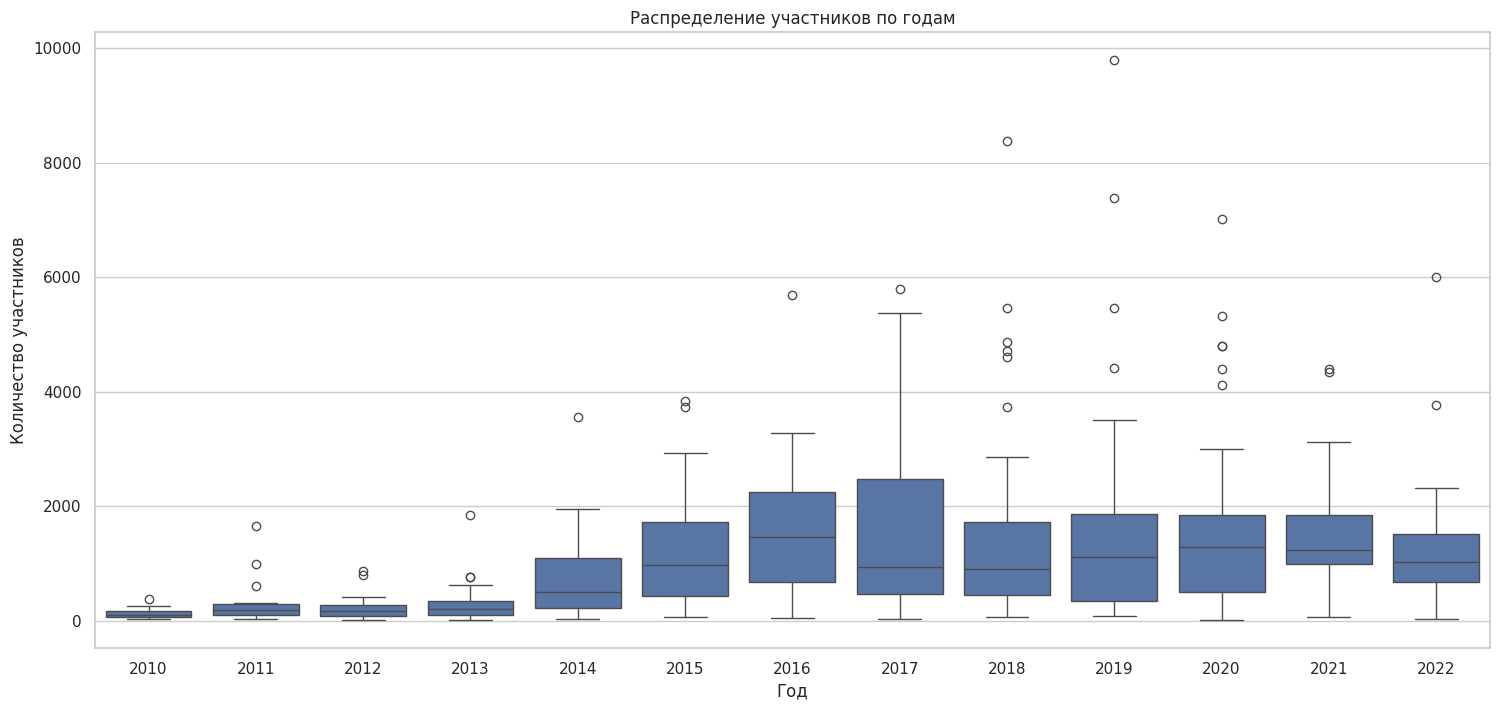

In [66]:
# Анализ конкурсов по количеству участников (competitors) - тут сложно говорить про динамику, но с годами количество участников даже меньше
plt.figure(figsize=(18, 8))
sns.boxplot(x='start_year', y='competitors', data=df)
plt.title('Распределение участников по годам')
plt.xlabel('Год')
plt.ylabel('Количество участников')
plt.show()

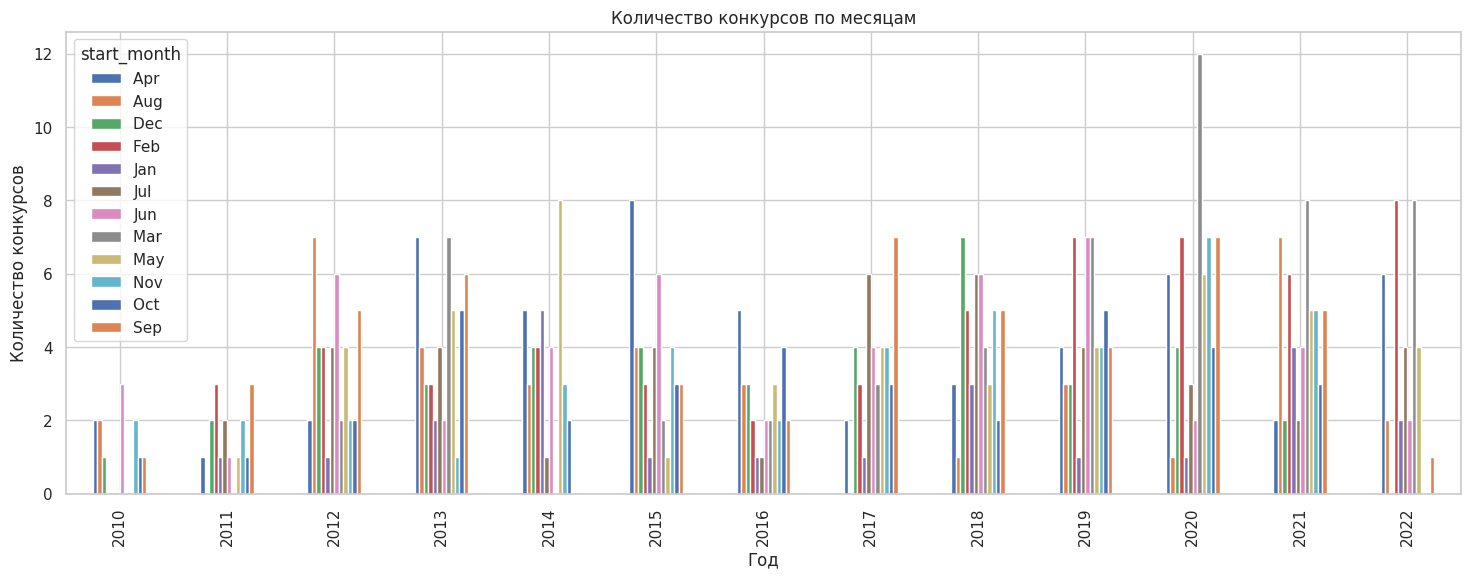

In [67]:
# Исходя из динамики можно заметить, что тенденция к определнным месяцам сохраняется
monthly_competitions = df.groupby(['start_year', 'start_month']).size().unstack()
monthly_competitions.plot(kind='bar', figsize=(18, 6))
plt.title('Количество конкурсов по месяцам')
plt.xlabel('Год')
plt.ylabel('Количество конкурсов')
plt.show()

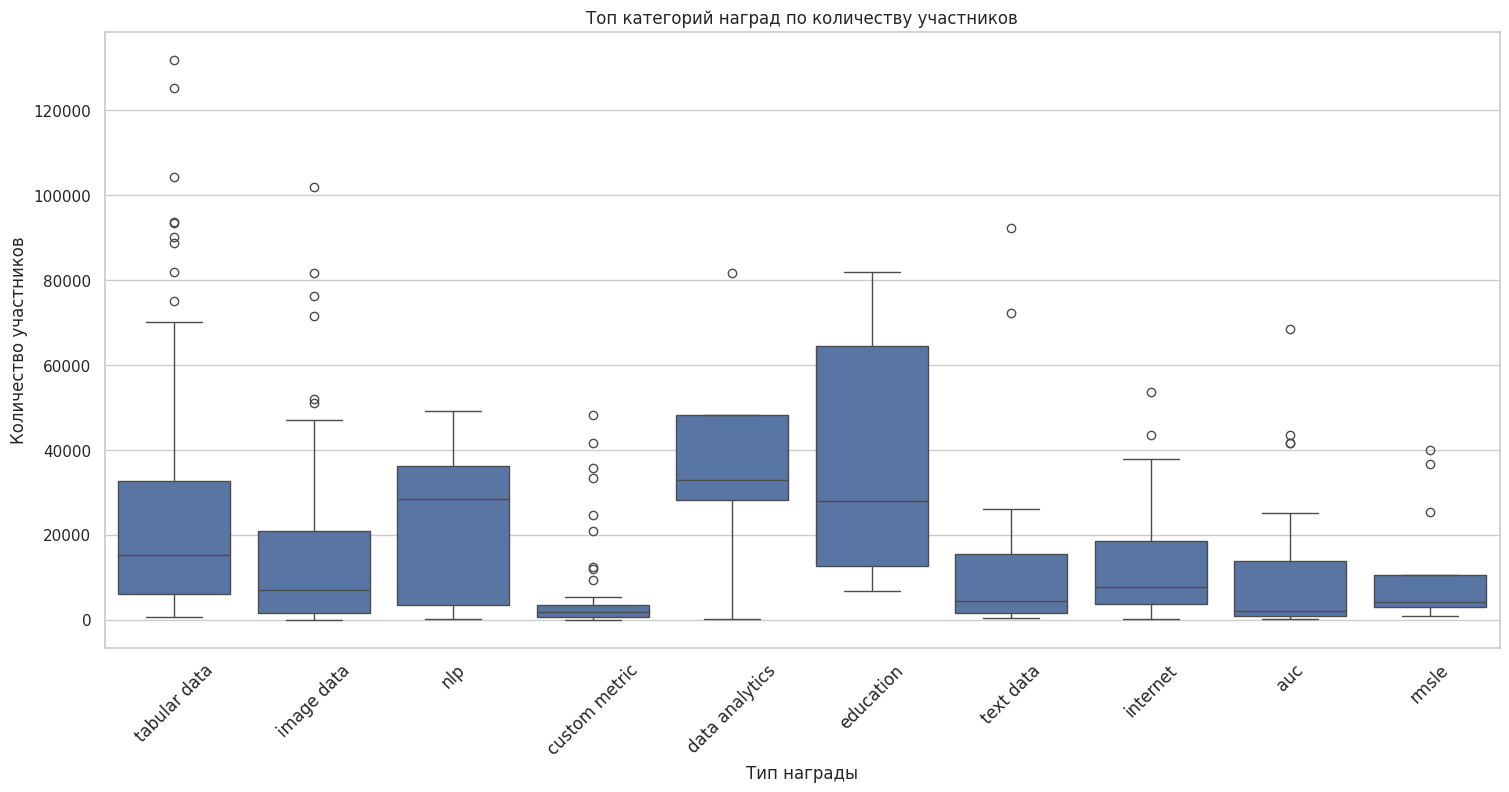

In [68]:
# кросс-анализ между типами наград и участниками - как и ранее было замечено, категория образование довольно популярна
top_tags = df.groupby('Tag')['Entries'].sum().nlargest(10).index
filtered_df = df[df['Tag'].isin(top_tags)]

plt.figure(figsize=(18, 8))
sns.boxplot(data=filtered_df, x='Tag', y='Entries')
plt.title('Топ категорий наград по количеству участников')
plt.xlabel('Тип награды')
plt.ylabel('Количество участников')
plt.xticks(rotation=45, fontsize=12)
plt.show()